# Import necessary libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, chi2, poisson, chisquare

# Load the data

In [2]:

file_path = '/content/data_24t3.xlsx'  # Update path if necessary
df = pd.read_excel(file_path)

# Display first few rows of data to understand the structure

In [3]:
print("Data preview:")
print(df.head())

Data preview:
   obs
0    1
1    4
2    2
3    2
4    8


# Descriptive statistics for "obs" column

In [4]:
print("\nDescriptive Statistics:")
print(df['obs'].describe())


Descriptive Statistics:
count    100.000000
mean       3.920000
std        2.038419
min        0.000000
25%        2.000000
50%        4.000000
75%        5.000000
max       10.000000
Name: obs, dtype: float64


# Plot distribution of scratches

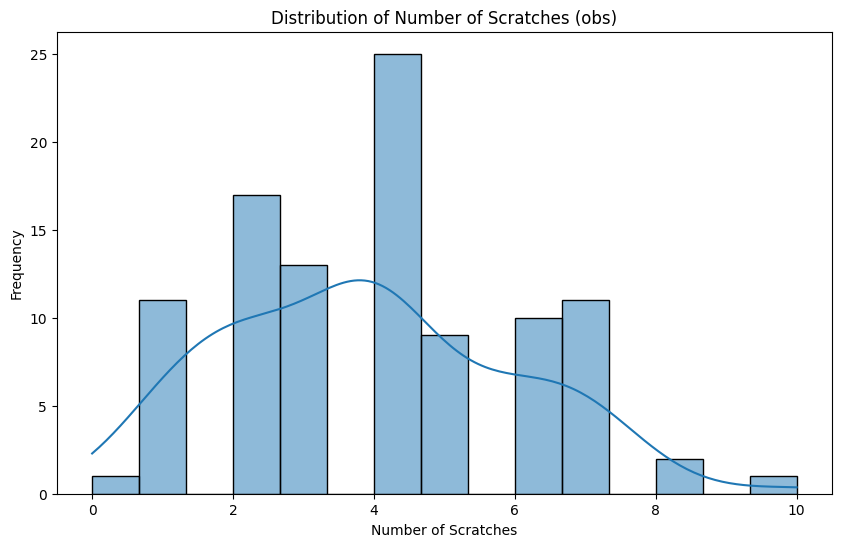

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['obs'], bins=15, kde=True)
plt.title("Distribution of Number of Scratches (obs)")
plt.xlabel("Number of Scratches")
plt.ylabel("Frequency")
plt.show()

# Check distribution type based on mean, median, and mode

In [6]:
mean = df['obs'].mean()
median = df['obs'].median()
mode = df['obs'].mode()[0]

print("\nMean:", mean)
print("Median:", median)
print("Mode:", mode)


Mean: 3.92
Median: 4.0
Mode: 4


# Determine skewness

In [7]:
if mean > median > mode:
    distribution_type = "Right skewed distribution as mean > median > mode"
elif mode > median > mean:
    distribution_type = "Left skewed distribution as mode > median > mean"
elif mean < median < mode:
    distribution_type = "Left skewed distribution as mean > median > mode"
elif mode < median < mean:
    distribution_type = "Right skewed distribution as mode > median > mean"
else:
    distribution_type = "None of the above"

print("Distribution type based on descriptive statistics:", distribution_type)

Distribution type based on descriptive statistics: None of the above


# Chi-square goodness of fit test for "obs" column
# Assuming Poisson distribution for the observed data




# Expected values from Poisson distribution

In [8]:
lambda_param = mean  # Poisson mean
max_obs = df['obs'].max()
expected_counts = [poisson.pmf(k, lambda_param) * len(df) for k in range(max_obs + 1)]

# Observed frequencies

In [9]:
observed_counts = df['obs'].value_counts().sort_index().reindex(range(max_obs + 1), fill_value=0)

# Perform Chi-square test

In [11]:
# Adjust expected counts to match the sum of observed counts
expected_counts = np.array(expected_counts)
expected_counts = expected_counts * (observed_counts.sum() / expected_counts.sum())

# Perform Chi-square test
chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)
degrees_of_freedom = len(observed_counts) - 1

print("\nChi-square goodness of fit test results:")
print("Chi-square Statistic:", chi2_stat)
print("Degrees of Freedom:", degrees_of_freedom)
print("p-value:", p_value)

# Conclusion based on significance level 0.05
if p_value < 0.05:
    conclusion = "Reject the null hypothesis. The distribution does not fit well to the assumed distribution."
else:
    conclusion = "Fail to reject the null hypothesis. The distribution fits the assumed distribution well."

print("Conclusion:", conclusion)



Chi-square goodness of fit test results:
Chi-square Statistic: 15.733317977556668
Degrees of Freedom: 10
p-value: 0.10752521470899878
Conclusion: Fail to reject the null hypothesis. The distribution fits the assumed distribution well.


# Final Answer for Questions
# 1. Based on the given sample data, the column “obs” can be assumed to have a __
**Reasoning:**

The 'obs' column represents the number of scratches on cars. This is a count variable, meaning it can only take on discrete, non-negative integer values (0, 1, 2, 3, and so on). Continuous variables, on the other hand, can take on any value within a given range. Since the number of scratches can't be a fraction or a negative number, it's a discrete variable.

**Answer:**

Discrete distribution

# 2. Answer for Expected number of scratches

In [12]:
expected_scratches = mean
print("\nExpected number of scratches:", expected_scratches)


Expected number of scratches: 3.92


# 3. Answer for Distribution type

In [13]:
print("Distribution Type:", distribution_type)

Distribution Type: None of the above


# 4. Answer for Probability of observing exactly 3 defects under Poisson

In [14]:
prob_3_defects = poisson.pmf(3, lambda_param)
print("Probability of observing exactly 3 defects:", prob_3_defects)

Probability of observing exactly 3 defects: 0.19919231620952907


# 5. Answer for Chi-square Test Statistic

In [15]:
print("Chi-square Test Statistic:", chi2_stat)

Chi-square Test Statistic: 15.733317977556668


# 6. Answer for p-value

In [16]:
print("p-value:", p_value)

p-value: 0.10752521470899878


# 7. Answer for Degrees of Freedom

In [17]:
print("Degrees of Freedom:", degrees_of_freedom)

Degrees of Freedom: 10


# (iitm_onlineDegree.csv) for analysing the following case. The data of the preferred subject of choice was collected from IITM online degree students between Male and Female students.

In [18]:
# Load the data
file_path = '/content/iitm_onlineDegree.csv'  # Update path if necessary
df = pd.read_csv(file_path)

In [19]:
# Display first few rows of data to understand the structure
print("Data preview:")
print(df.head())

Data preview:
   Gender   Preference
0  Female     Business
1  Female  Programming
2    Male     Business
3  Female   Statistics
4  Female  Programming


# Create a contingency table of preferred subject choices by gender

In [22]:
contingency_table = pd.crosstab(df['Gender'], df['Preference'])
print("\nContingency Table:")
print(contingency_table)


Contingency Table:
Preference  Business  Programming  Statistics
Gender                                       
Female           175           58         200
Male             139           36         124


# Perform Chi-square test of independence

In [23]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Q8. What is the degree of freedom?

In [24]:
print("\nDegrees of Freedom:", dof)


Degrees of Freedom: 2


# Q9. Expected value of Female in Business subject

In [25]:
expected_female_business = expected[0, 0]  # Assuming Female is row 0 and Business is column 0
print("Expected value of Female in Business subject:", round(expected_female_business, 2))

Expected value of Female in Business subject: 185.74


# Q10. What is the calculated value of Chi square statistic?

In [26]:
print("Calculated Chi-square Statistic:", round(chi2_stat, 2))


Calculated Chi-square Statistic: 2.66


# Q11. Find tabulated value of chi-square at 0.05 significance level

In [27]:
alpha = 0.05
chi2_critical = chi2.ppf(1 - alpha, dof)
print("Tabulated Chi-square Value:", round(chi2_critical, 2))

Tabulated Chi-square Value: 5.99


# Q12. What is the p-value?

In [28]:
print("p-value:", round(p_value, 4))

p-value: 0.2641


# Q13. Conclusion based on significance level 0.05

In [29]:
if p_value < alpha:
    conclusion = "Reject the null hypothesis and conclude that the categorical variables are not independent."
else:
    conclusion = "Fail to reject the null hypothesis and conclude that the categorical variables are independent."

print("Conclusion:", conclusion)

Conclusion: Fail to reject the null hypothesis and conclude that the categorical variables are independent.
